In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

**Importing the dataset**

In [ ]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.drop_duplicates()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
del df['User ID']

In [ ]:
lr=LabelEncoder()
df['Gender']=lr.fit_transform(df['Gender'])
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
x=df.iloc[:,:3]
y=df.iloc[:,3]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(x_train)
x_train=scale.transform(x_train)
x_test=scale.transform(x_test)

**Fitting Random Forest to the Training set**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

**Predicting the Test set results**

In [ ]:
y_pred=rf.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9
0.875
0.9005924950625412
[[44  5]
 [ 3 28]]


Visualising the Training set results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


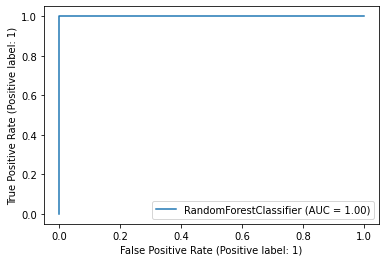

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve
y_train_pred=rf.predict(x_train)
fpr,tpr,thresholds=roc_curve(y_train,y_train_pred,pos_label=2)
plot_roc_curve(rf,x_train,y_train)

**Visualising the Test set results**

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


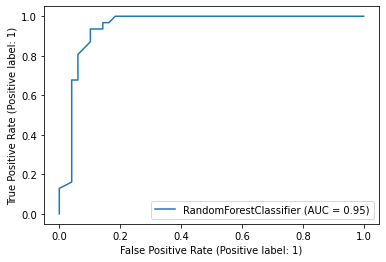

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=2)
plot_roc_curve(rf,x_test,y_test)